# 🙌🏻Welcome to Professor Heewon Kim’s Machine Learning Class – Week 2 Assignment
This code was generated for the Machine Learning class at Soongsil University (Realitylab).


In [ ]:
# 미디어경영학과 20231659 강남희

## The Gaussian Distribution

확률변수 $Z$가 따르는 가우시안/정규분포의 확률밀도함수는 다음과 같다.
$$ p(z) = \frac{1}{\sqrt{2\pi}} e^{-z^2 / 2}. $$

이는 모든 실수 값 $z$, 즉 $-\infty$ 부터 $\infty$ 까지 정의된다.

분포는 다음과 같은 형태를 가진다.

In [4]:
!pip install -q symbulate
from symbulate import *

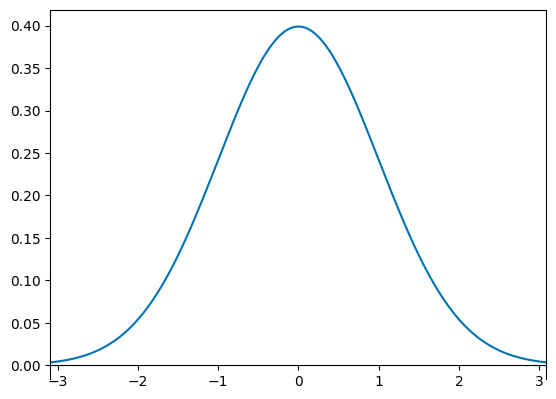

In [2]:
Normal().plot()

## The (General) Normal Distribution

표준 정규분포는 평균이 0이고 분산이 1인 분포이다. 일반적으로 우리는 아래의 두 항목을 할 수 있다.
- scale the bell shape to be as wide as we want, 
- shift the bell shape to be centered wherever we want.

만약 $Z$ 가 정규 분포(standard normal) 라면, 
$$ X = \mu + \sigma Z $$
는 $\text{Normal}(\mu, \sigma)$ 를 따른다.

여기에서 parameter $\mu$ 는 expected value이고, parameter $\sigma$ 는 표준 편차(standard deviation)이다. (따라서 $\sigma^2$ 는 variance이다.)

## Assignment 1
여러 개의 정규분포를 생성하여 비교하시오.

각 분포는 평균과 표준편차가 다르며, 이를 통해 **μ**이 분포의 중심 위치를 어떻게 바꾸는지, 그리고 **σ**가 분포의 폭과 모양을 어떻게 변화시키는지 확인할 수 있습니다.

다음 분포들을 한 그래프에 그려 서로 비교하라. 각 분포는 다른 색으로 표시하고 범례(legend)를 추가하시오.

- 평균 = 1, 표준편차 = 0.25
- 평균 = 1, 표준편차 = 0.5
- 평균 = 1, 표준편차 = 0.75
- 평균 = 3, 표준편차 = 0.25
- 평균 = 3, 표준편차 = 0.5
- 평균 = 3, 표준편차 = 0.75

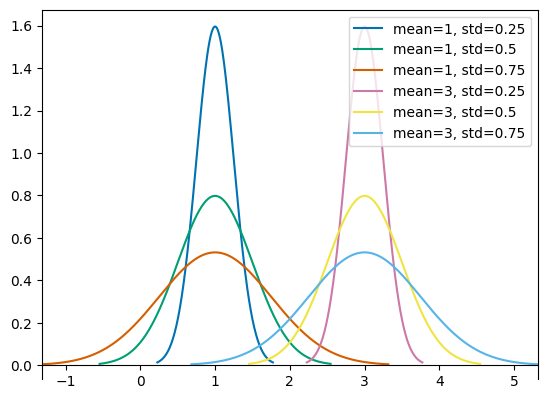

In [21]:
''' Assignment 1 '''
import matplotlib.pyplot as plt

params = [
    (1, 0.25),
    (1, 0.5),
    (1, 0.75),
    (3, 0.25),
    (3, 0.5),
    (3, 0.75)
]

for mean, std in params:
    Normal(mean, std).plot(label=f"mean={mean}, std={std}")

plt.legend()

# Probability

확률을 계산하기 위해서는 해당 구간에 대해 확률밀도함수(p.d.f.)를 적분한다. 예를 들어,

$$ P(Z \leq 1) = \int_{-\infty}^1 \frac{1}{\sqrt{2\pi}} e^{-z^2 / 2}\,dz. $$

우리가 이전에 공부한 다른 연속분포와 달리, 확률밀도함수 $p(z)$는 초등적(초등함수 형태의) 부정적분을 가지지 않는다. 이는 미적분에서 배운 기법만으로는 이 적분을 종이에 직접 계산할 수 없음을 의미한다. 따라서 수치적으로 계산해야 한다. 다행히, Symbulate을 사용하면 이를 쉽게 계산할 수 있다.

예를 들어, $P(Z \leq 1)$ 은 단순히 누적분포함수(c.d.f.)를 $1$ 에서 평가한 값이다. 표준 정규분포의 누적분포함수는 흔히 $\Phi(z)$로 표기된다. 따라서 우리는 $\Phi(1)$을 계산해야 한다.

In [10]:
Normal().cdf(1)

0.8413447460685429

## Assignment 2:

표준 정규분포 $Z∼N(0,1)$ 에 대하여, 확률 $P(−2<Z<2)$ 를 계산하시오.

힌트: 표준 정규분포의 누적분포함수(CDF, $Φ(z)$ )를 이용하여 구할 수 있다.

**파이썬의 Normal().cdf 함수를 사용하여 작성하시오.**

**그 외의 함수를 활용하면 0점 처리하겠습니다**

In [23]:
''' Assignment 2'''
# P(-2 < Z < 2) = P(Z < 2) - P(Z < -2)
Normal().cdf(2) - Normal().cdf(-2)

0.9544997361036416

# Monte Carlo Approximation 

## Example 1: Coin Flip Example

공정한 동전에서 앞면이 나올 확률은 $1/2$이다. 몬테카를로 방법을 사용하여 동전 던지기를 5000번 반복적으로 시뮬레이션하여, 앞면이나 뒷면이 나올 확률이 항상 $1/2$임을 확인한다.

<p align="center">
  <img src="https://raw.githubusercontent.com/shiernee/Advanced_ML/main/Week2/CoinFlip.png" width="450"/>
</p>


In [24]:
import random
import numpy as np
import matplotlib.pyplot as plt
# ================== import requirement library ================== #

# coin flip function:
# 0 --> Head
# 1 --> Tail

def coin_flip():
  return random.randint(0, 1)

# check the output of coin_flip
for i in range(10):
  print('iteration' + str(i) + '--> ' + str(coin_flip()))

# Monte Carlo Simulation
list1= []

def monte_carlo(n):
  results = 0
  plt.axhline(y=0.5, color='r', linestyle='-')

  for i in range(n):
    flip_result = coin_flip()
    results = results + flip_result

    # calculate probabibility valuue
    prob_value = results / (i+1)

    # append probability to list1
    list1.append(prob_value)

    # plot results    
    plt.xlabel('iteration')
    plt.ylabel('probability')
    plt.plot(list1)

  return results / n

iteration0--> 0
iteration1--> 1
iteration2--> 0
iteration3--> 1
iteration4--> 1
iteration5--> 1
iteration6--> 1
iteration7--> 1
iteration8--> 0
iteration9--> 0


final value of probability:  0.5068


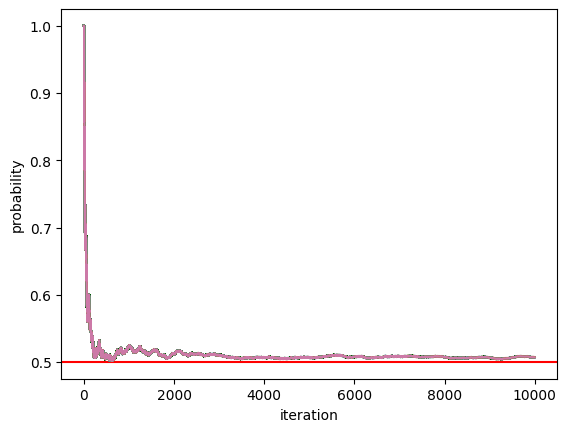

In [25]:
# call monte carlo functioin
answer = monte_carlo(10000)
print('final value of probability: ', answer)

# Example 2: Estimating Pi from Circle and Square

$\pi$ 값을 추정하기 위해, 우리는 원과 정사각형의 면적을 사용할 수 있다.

$$ \frac{Area \ Circle}{Area \ Square} = \frac{\pi*r^2}{2r * 2r}  $$
$$ \frac{Area \ Circle}{Area \ Square} = \frac{\pi}{4}  $$

따라서 $\pi$값은 다음 공식을 사용하여 추정할 수 있다.
$$ \pi = 4* \frac{Area \ Circle}{Area \ Square} $$

<p align="center">
<img src="https://raw.githubusercontent.com/shiernee/Advanced_ML/main/Week2/EstimatePiFromCircleSquare.png" width="350">
</p>

$$ r = 0.5 \text{라고\ 가정하면,} $$

$$ \text{length\_of\_field} = 2r = 1.0 $$



In [74]:
import turtle
from random import random 
import matplotlib.pyplot as plt
import math
# ================== import requirement library ================== #

# simulate raindrop 
# return x and y coordinates of raindrop

def rain_drop(length_of_field=1):
    """
    Simulate a random rain drop
    """
    return [(.5 - random()) * length_of_field, (.5 - random()) * length_of_field]

# check if raindrop fall in circle by using circle formula 

def is_point_in_circle(point, length_of_field=1):
    """
    Return True if point is in inscribed circle
    Use circle formula --> x^2 + y^2 <= r^2
    """
    return (point[0]) ** 2 + (point[1]) ** 2 <= (length_of_field / 2) ** 2

def plot_rain_drops(drops_in_circle, drops_out_of_circle, length_of_field=1, format='pdf'):
    """ Function to draw rain drops """
    number_of_drops_in_circle = len(drops_in_circle)
    number_of_drops_out_of_circle = len(drops_out_of_circle)
    number_of_drops = number_of_drops_in_circle + number_of_drops_out_of_circle
    plt.figure()
    plt.xlim(-length_of_field / 2, length_of_field / 2)
    plt.ylim(-length_of_field / 2, length_of_field / 2)
    plt.scatter([e[0] for e in drops_in_circle], [e[1] for e in drops_in_circle], color='blue', label="Drops in circle")
    plt.scatter([e[0] for e in drops_out_of_circle], [e[1] for e in drops_out_of_circle], color='black', label="Drops out of circle")
    plt.legend(loc="center")
    plt.title("%s drops: %s landed in circle, estimating $\pi$ as %.4f." % (number_of_drops, number_of_drops_in_circle, 4 * number_of_drops_in_circle / number_of_drops))
    plt.savefig("%s_drops.%s" % (number_of_drops, format))

# simulate raindrop 
# return total number of raindrop in circle and in square

def rain(number_of_drops=1000, length_of_field=1, plot=True, format='pdf', dynamic=False):
    """
    Function to make rain drops.
    """
    number_of_drops_in_circle = 0
    drops_in_circle = []
    drops_out_of_circle = []
    pi_estimate = []
    for k in range(number_of_drops):
        d = (rain_drop(length_of_field))
        if is_point_in_circle(d, length_of_field):
            drops_in_circle.append(d)
            number_of_drops_in_circle += 1
        else:
            drops_out_of_circle.append(d)
        if dynamic:  # The dynamic option if set to True will plot every new drop (this can be used to create animations of the simulation)
            print("Plotting drop number: %s" % (k + 1))
            plot_rain_drops(drops_in_circle, drops_out_of_circle, length_of_field, format)
        pi_estimate.append(4 * number_of_drops_in_circle / (k + 1))  # This updates the list with the newest estimate for pi.
    # Plot the pi estimates
    plt.figure()
    plt.scatter(range(1, number_of_drops + 1), pi_estimate)
    max_x = plt.xlim()[1]
    plt.hlines(math.pi, 0, max_x, color='black')
    plt.xlim(0, max_x)
    plt.title("$\pi$ estimate against number of rain drops")
    plt.xlabel("Number of rain drops")
    plt.ylabel("$\pi$")
    # plt.savefig("Pi_estimate_for_%s_drops_thrown.pdf" % number_of_drops)

    # 그래프를 읽기 편하게 눈금 간격을 조정했습니다.
    plt.xticks(np.arange(0, number_of_drops+1, step=50))

    if plot and not dynamic:
        # If the plot option is passed and matplotlib is installed this plots
        # the final set of drops
        plot_rain_drops(drops_in_circle, drops_out_of_circle, length_of_field, format)

    return [number_of_drops_in_circle, number_of_drops]



----------------------
500 drops
pi estimated as: 3.176 
----------------------


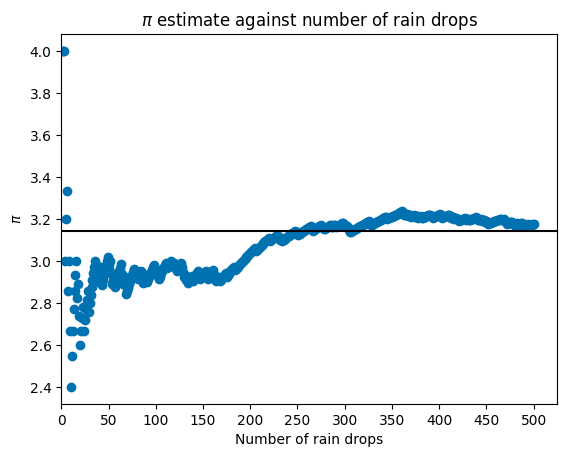

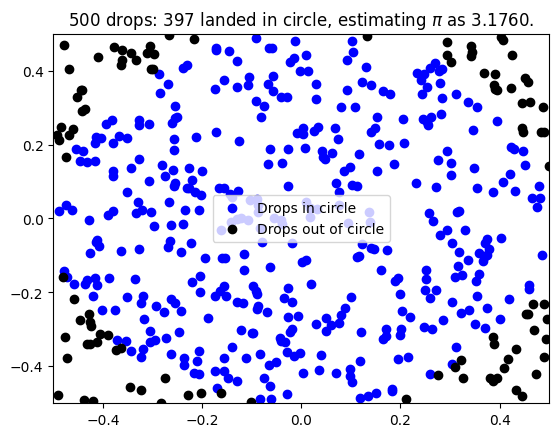

In [75]:
# call the function 
number_of_drops = 500
r = rain(number_of_drops, plot=True, format='png', dynamic=False)

print("----------------------")
print("%s drops" % number_of_drops)
print("pi estimated as: %s " % (4 * r[0] / r[1]))
print("----------------------")

## Assignment 3

몬테카를로(Monte Carlo) 시뮬레이션을 통해 원주율 $\pi$ 를 근사한다고 하자.

위의 코드 예제에서 number_of_drops 값을 점차 증가시키면서 추정된 $\pi$ 의 값을 확인하시오.

어느 정도의 number_of_drops에서 $\pi$ 값이 약 3.14에 수렴하기 시작하는지 기록하시오.

결과를 서술형으로 답변란에 작성하시오.

In [2]:
''' Assignment 3 '''
초반인 50~100개 구간에서는 추정값이 크게 오르내렸으나,
반복 횟수가 늘어날수록 변동 폭이 줄어들면서 점차 안정되는 모습을 보였다.
약 250개 이상부터는 추정값이 3.14 부근에서 비교적 안정적으로 수렴하는 경향이 뚜렷하게 나타났다.

따라서 약 250개 이상부터 π 값이 3.14에 수렴하기 시작한다고 결론지을 수 있다.

' Assignment 3 '

# Multivariate Gaussian Distribution

두 연속 확률변수에 대하여, 시뮬레이션된 $ (x,y)$ 값을 이용해 결합확률밀도함수(joint probability density function)를 추정하고 이를 시각화하라.

### Example. Assume  <br>
mean of X = 1, mean of Y = 2 <br>
variance of X = 2, variance of Y = 4 <br>
covariance of xy and yx = 1

In [5]:
mu    = [1, 2]
Sigma = [[2, 1],
         [1, 4]]

X, Y = RV(MultivariateNormal(mean = mu, cov = Sigma))
Z = X + Y

# understand each output 

x = X.sim(10000)
y = Y.sim(10000)
z = Z.sim(10000)
print('X mean:', x.mean())
print('Y mean:', y.mean())
print('Z mean:', z.mean())
print('X variance:', x.sd()**2)
print('Y variance:', y.sd()**2)
print('Z variance:', z.sd()**2)

X mean: 1.0042540925827768
Y mean: 2.036004004190785
Z mean: 2.9870099241692123
X variance: 1.9512640598179027
Y variance: 3.9436397354407204
Z variance: 8.076892662065017


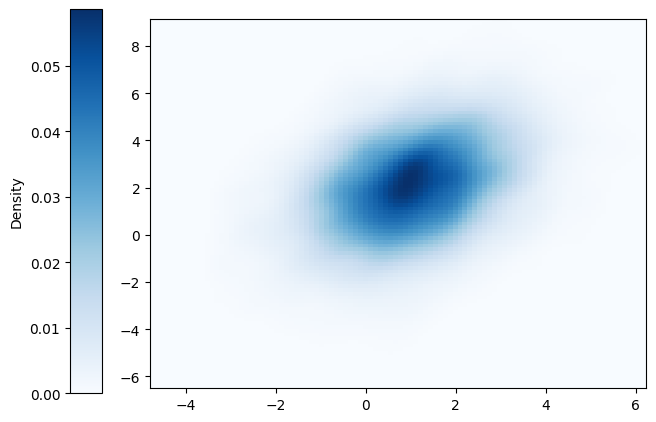

In [6]:
(X & Y).sim(10000).plot(type="density")

## Assignment 4

다변량 정규분포(Multivariate Gaussian)를 생성하시오.

- $X$ 의 분산은 2, 
- $Y$ 의 분산은 4로 설정한다.

아래 제시된 그림과 유사한 분포를 시각화하시오.

<img src="https://raw.githubusercontent.com/shiernee/Advanced_ML/main/Week2/Exercise3_Multivariate_Image.png" width="512">

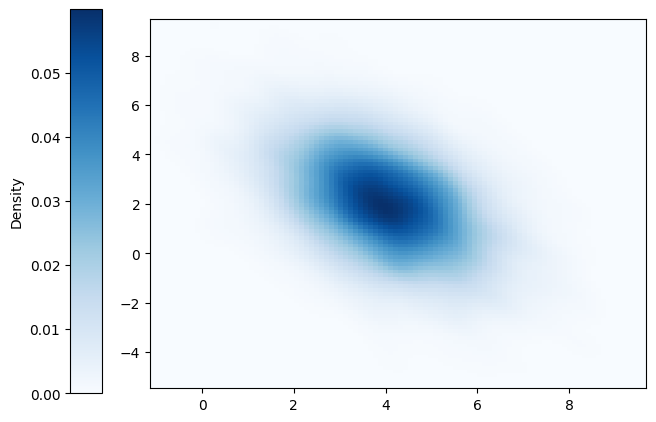

In [20]:
''' Assignment 4 '''
import numpy as np

mu = [4, 2]
var_x, var_y = 2, 4

rho = -0.45
cov = rho * np.sqrt(var_x * var_y)

Sigma = [[var_x, cov],
         [cov,   var_y]]

X, Y = RV(MultivariateNormal(mean=mu, cov=Sigma))

(X & Y).sim(10000).plot(type="density")

# Regularization 

여기서는 릿지 회귀(Ridge regression)에서 정규화 항이 과적합(overfitting)을 줄이는 데 어떻게 도움이 되는지를 살펴본다.

In [23]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import mean_squared_error as mse

# generate 1d regression data 
def make_1dregression_data(n=21):
    np.random.seed(0)
    xtrain = np.linspace(0.0, 20, n)
    xtest = np.arange(0.0, 20, 0.1)
    sigma2 = 4
    w = np.array([-1.5, 1/9.])
    fun = lambda x: w[0]*x + w[1]*np.square(x)
    ytrain = fun(xtrain) + np.random.normal(0, 1, xtrain.shape) * \
        np.sqrt(sigma2)
    ytest= fun(xtest) + np.random.normal(0, 1, xtest.shape) * \
        np.sqrt(sigma2)
    return xtrain, ytrain, xtest, ytest


In [24]:
import numpy as np
n=21
xtrain = np.linspace(0.0, 20, n)
w = np.array([-1.5, 1/9.])
fun = lambda x: w[0]*x + w[1]*np.square(x)

ytrain = fun(xtrain)

In [25]:
# split data into train and test
xtrain, ytrain, xtest, ytest = make_1dregression_data(n=21)

#Rescaling data
scaler = MinMaxScaler(feature_range=(-1, 1))
Xtrain = scaler.fit_transform(xtrain.reshape(-1, 1))
Xtest = scaler.transform(xtest.reshape(-1, 1))

# fit Ridge model with different regularizer strength
deg = 14
alphas = np.logspace(-10, 1.3, 10)  # Regularization strength
nalphas = len(alphas)
mse_train = np.empty(nalphas)
mse_test = np.empty(nalphas)
ytest_pred_stored = dict()


for i, alpha in enumerate(alphas):
    model = Ridge(alpha=alpha, fit_intercept=False)
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)  # create 14 features which is used as X
    Xtrain_poly = poly_features.fit_transform(Xtrain)
    model.fit(Xtrain_poly, ytrain)
    ytrain_pred = model.predict(Xtrain_poly)
    Xtest_poly = poly_features.transform(Xtest)
    ytest_pred = model.predict(Xtest_poly)
    mse_train[i] = mse(ytrain_pred, ytrain) 
    mse_test[i] = mse(ytest_pred, ytest)
    ytest_pred_stored[alpha] = ytest_pred


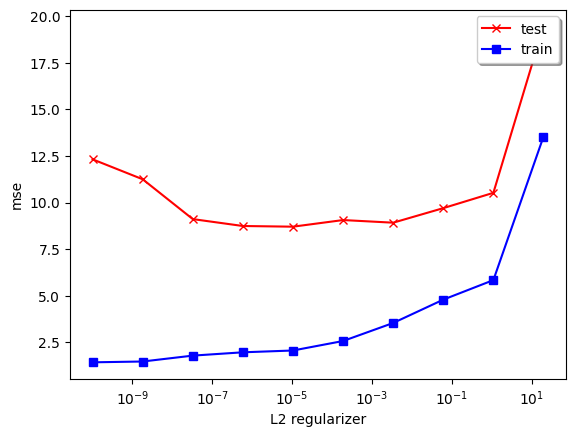

In [26]:
# Plot MSE vs degree
fig, ax = plt.subplots()
mask = [True]*nalphas
ax.plot(alphas[mask], mse_test[mask], color = 'r', marker = 'x',label='test')
ax.plot(alphas[mask], mse_train[mask], color='b', marker = 's', label='train')
ax.set_xscale('log')
ax.legend(loc='upper right', shadow=True)
plt.xlabel('L2 regularizer')
plt.ylabel('mse')
plt.show()


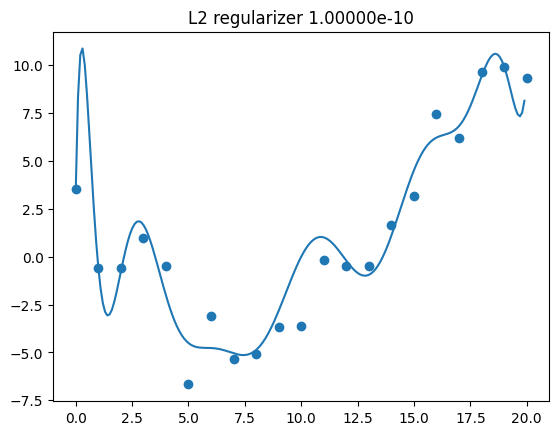

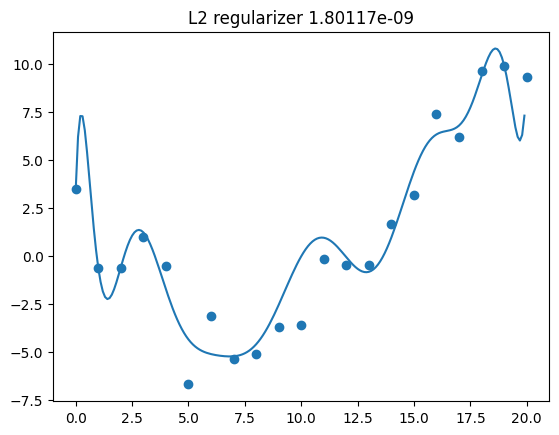

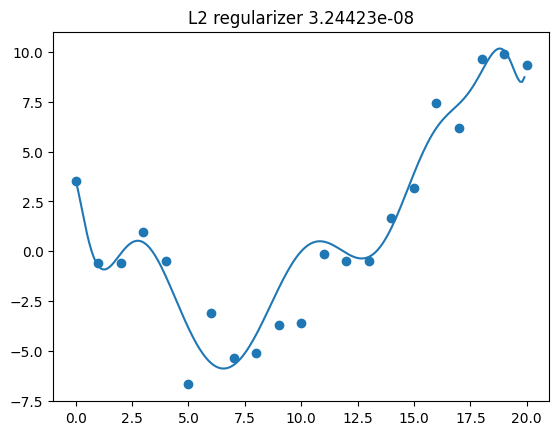

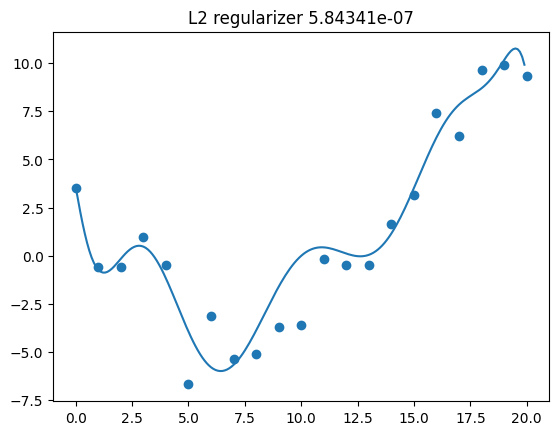

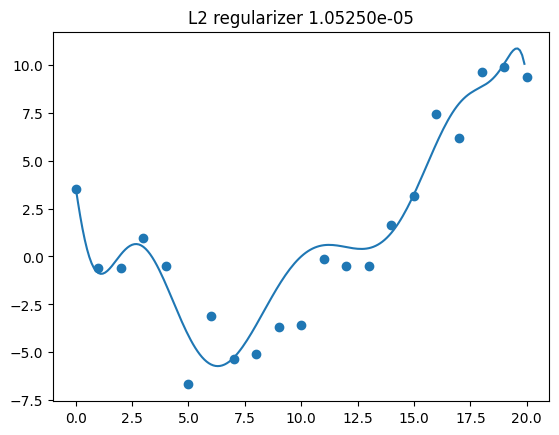

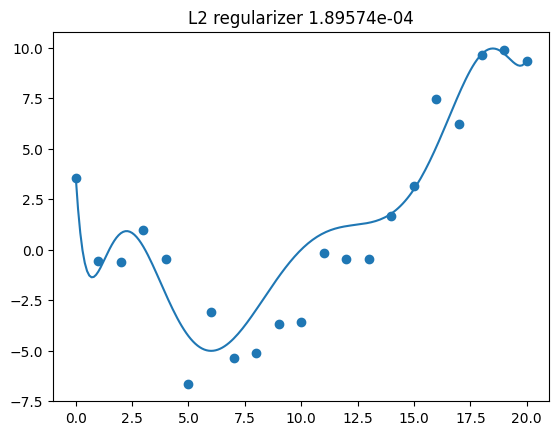

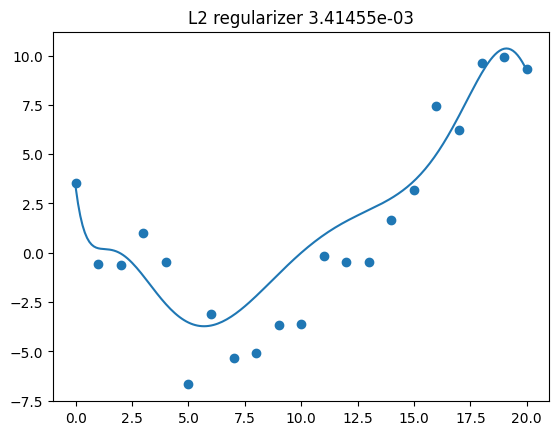

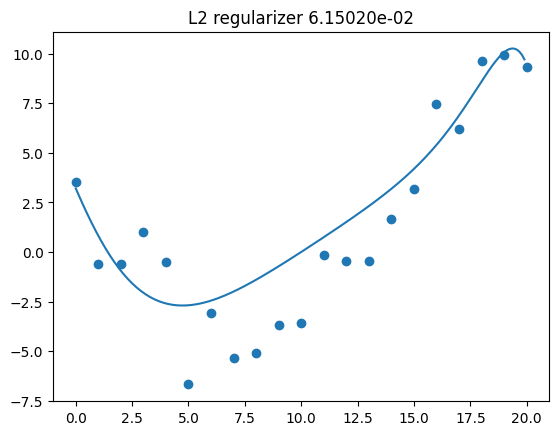

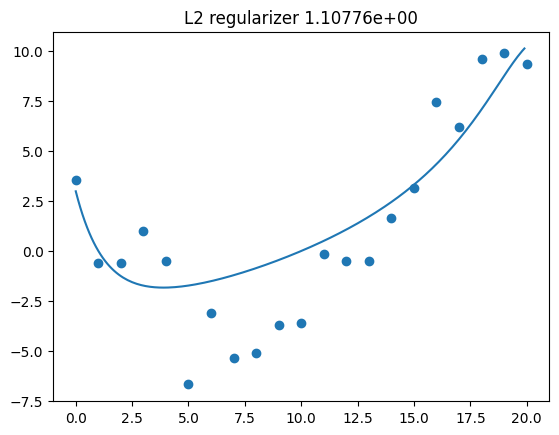

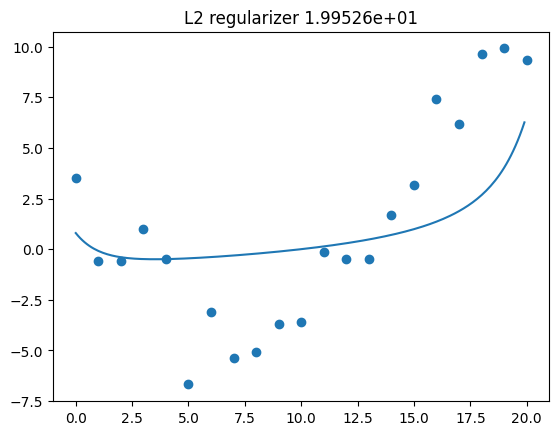

In [27]:
# Plot fitted functions
chosen_alphas = alphas[[0,5,8]]
for i, alpha in enumerate(alphas):
    fig, ax = plt.subplots()
    ax.scatter(xtrain, ytrain)
    ax.plot(xtest, ytest_pred_stored[alpha])
    plt.title('L2 regularizer {:0.5e}'.format(alpha))
    plt.show()

## Assignment 5

- 모델 학습에서 **정규화 계수(regularizer strength)** 를 어떻게 선택하는 것이 최적인지 설명하시오.

- 정규화 계수가 너무 작을 때와 너무 클 때 각각 모델에 어떤 영향을 주는지 비교하시오.

- 최적의 정규화 계수를 찾기 위해 사용할 수 있는 방법(예: 검증 데이터셋 활용, 교차 검증 등)을 설명하시오.

아래 셀에 답변을 작성하시오.

In [34]:
''' Assignment 5 '''

# 1. 모델 학습에서 정규화 계수(regularizer strength) 를 어떻게 선택하는 것이 최적인지 설명하시오.
최적의 정규화 계수를 선택하는 기준은 Training Error와 Test Error 간의 균형이다.
모델을 여러 번 학습시키면서 정규화 계수 값을 변화시킨 뒤, 검증 과정을 통해 후보를 정하고, 
최종적으로 테스트 데이터셋에서의 오차를 비교하여 성능이 가장 안정적인 지점을 선택한다.
이때 테스트 오차가 가장 낮은 계

# 2. 정규화 계수가 너무 작을 때와 너무 클 때 각각 모델에 어떤 영향을 주는지 비교하시오.
정규화 계수가 너무 작은 경우, 제약이 거의 없어 모델의 복잡도가 과도하게 높아진다.
그 결과, 훈련 데이터에는 지나치게 잘 맞지만 새로운 데이터에 대해서는 
예측 성능이 떨어지는 overfitting 현상이 발생한다.

반대로 정규화 계수가 너무 큰 경우, 모델의 복잡도가 지나치게 낮아져 
데이터의 복잡한 관계나 패턴을 충분히 학습하지 못한다.
이로 인해 훈련 데이터뿐만 아니라 테스트 데이터에서도 오차가 커지는 underfitting 상태에 빠지게 된다.

# 3. 최적의 정규화 계수를 찾기 위해 사용할 수 있는 방법(예: 검증 데이터셋 활용, 교차 검증 등)을 설명하시오.
최적의 정규화 계수를 찾기 위해서는
검증 데이터셋 활용, 교차 검증, early stopping 등과 같은 방법을 사용할 수 있다.

우선 검증 데이터셋을 활용하는 방법은 훈련 데이터로 여러 정규화 계수를 적용해 모델을 학습한 뒤,
검증 데이터에서의 성능을 비교하여 오차가 가장 작은 값을 선택하는 방식이다.
이때 테스트 데이터는 학습 과정에서 전혀 사용되지 않는 완전히 새로운 데이터로, 
최종적으로 모델의 성능을 평가하기 위해 남겨둔다. 따라서 정규화 계수 선택에는 검증 데이터셋이 활용된다.
다만 데이터가 적을 경우, 검증용으로 일부를 분리하는 것만으로도 학습 데이터가 부족해질 수 있다는 한계가 있다. 

이러한 문제를 보완하는 방법이 교차 검증이다.
데이터를 여러 부분으로 나누어 번갈아 검증용으로 사용하면서 학습을 반복함으로써, 
데이터가 적어도 모든 데이터를 효율적으로 활용할 수 있고 신뢰성 있는 정규화 계수를 선택할 수 있다.

또한 early stopping은 학습 과정에서 검증 오차가 더 이상 줄지 않고 오히려 증가하기 시작하는 시점에서 
학습을 멈추어 과적합을 방지하는 방법으로, 정규화 계수의 적절한 선택에 도움을 준다.

마지막으로, 데이터가 충분히 많고 모델 규모가 커질수록 복잡한 모델이라도 
일반화 성능이 개선되어 과적합이 완화되므로 안정적인 정규화 계수 선택이 가능해진다.

' Assignment 5 '